# Advanced Machine Learning Project 2

## Supervised Learning - Bank Loan Defaulter Prediction

## 1

### Read the dataset and display some information about the dataset

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

# splitting, scaling, and encoding
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# evaluation metrics
from sklearn import metrics
from sklearn.metrics import recall_score

# Models
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Package for handling imbalance data
#!pip install imblearn
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

# Pipeline and transformer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#!pip install mlxtend
import joblib
import sys
sys.modules['sklearn.externals.joblib'] = joblib
from mlxtend.feature_selection import SequentialFeatureSelector as sfs
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs


# Hyperparameter tuning
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV

# To view all the columns
pd.set_option('display.max_columns', None)

In [84]:
# Creating dataframe with given CSV file
df = pd.read_csv('bank_loan_defaulter.csv')
df.head().T

,0,1,2,3,4
ID,65087372,1450153,1969101,6651430,14354669
Loan Amount,10000,3609,28276,11170,16890
Funded Amount,32236,11940,9311,6954,13226
Funded Amount Investor,12329.36286,12191.99692,21603.22455,17877.15585,13539.92667
Term,59,59,59,59,59
Batch Enrolled,BAT2522922,BAT1586599,BAT2136391,BAT2428731,BAT5341619
Interest Rate,11.135007,12.237563,12.545884,16.731201,15.0083
Grade,B,C,F,C,C
Sub Grade,C4,D3,D4,C3,D4
Employment Duration,MORTGAGE,RENT,MORTGAGE,MORTGAGE,MORTGAGE


In [3]:
# Checking few samples of data
df.sample(5)

,ID,Loan Amount,Funded Amount,Funded Amount Investor,Term,Batch Enrolled,Interest Rate,Grade,Sub Grade,Employment Duration,Home Ownership,Verification Status,Payment Plan,Loan Title,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Initial List Status,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Application Type,Last week Pay,Accounts Delinquent,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Loan Status
62750,10478581,23138,16563,23330.302060,59,BAT3193689,11.286591,B,B5,RENT,126073.29850,Source Verified,n,Other,15.566018,1,0,11,0,5063,35.914107,58,w,2449.950717,0.110602,3.486207,0.973538,0,INDIVIDUAL,39,0,45,163633,33179,0
65234,1608868,21905,16167,11544.472560,58,BAT2575549,9.428928,C,C2,RENT,75088.03753,Source Verified,n,Credit card refinancing,13.501549,0,3,14,0,13476,7.132695,20,f,1326.368593,0.035285,6.208327,0.500962,0,INDIVIDUAL,8,0,38,165246,39916,1
10630,7743975,21825,22325,10890.783850,59,BAT4694572,14.071133,B,D1,RENT,92178.79508,Source Verified,n,Debt consolidation,21.136037,0,0,13,0,5285,48.348655,42,f,1319.866260,0.018606,0.403520,1.084141,0,INDIVIDUAL,79,0,37,255479,3904,0
10384,28148729,29664,5737,6472.386368,59,BAT1780517,15.330165,D,D1,MORTGAGE,66558.92520,Verified,n,Credit card refinancing,10.481902,0,2,10,0,21883,43.202195,9,f,1392.651808,0.025149,1.373868,0.792394,0,INDIVIDUAL,15,0,22,160892,44115,0
31198,66534499,21816,16029,31194.032500,59,BAT1761981,21.848506,C,A4,MORTGAGE,72316.24420,Not Verified,n,Debt Consolidation,20.891246,0,0,13,0,1451,62.702360,19,f,2157.487193,0.066696,0.212720,1.072394,0,INDIVIDUAL,100,0,407,20565,14280,0


In [4]:
# Size of the data
df.size

2361205

In [5]:
# Shape of the data
df.shape

(67463, 35)

In [6]:
# Checking the info about the data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 35 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ID                            67463 non-null  int64  
 1   Loan Amount                   67463 non-null  int64  
 2   Funded Amount                 67463 non-null  int64  
 3   Funded Amount Investor        67463 non-null  float64
 4   Term                          67463 non-null  int64  
 5   Batch Enrolled                67463 non-null  object 
 6   Interest Rate                 67463 non-null  float64
 7   Grade                         67463 non-null  object 
 8   Sub Grade                     67463 non-null  object 
 9   Employment Duration           67463 non-null  object 
 10  Home Ownership                67463 non-null  float64
 11  Verification Status           67463 non-null  object 
 12  Payment Plan                  67463 non-null  object 
 13  L

In [7]:
# Checking the data distribution on the output variable
df['Loan Status'].value_counts()

0    61222
1     6241
Name: Loan Status, dtype: int64

In [8]:
# Renaming the columns
df = df.rename(columns = {'Employment Duration':'Home Ownership','Home Ownership':'Employment Duration'})

## 2

### Data cleansing and Exploratory data analysis

In [9]:
# Finding Duplicates
df.duplicated().sum()

0

In [10]:
# Checking percentage of Null values
df.isna().sum()/len(df) *100

ID                              0.0
Loan Amount                     0.0
Funded Amount                   0.0
Funded Amount Investor          0.0
Term                            0.0
Batch Enrolled                  0.0
Interest Rate                   0.0
Grade                           0.0
Sub Grade                       0.0
Home Ownership                  0.0
Employment Duration             0.0
Verification Status             0.0
Payment Plan                    0.0
Loan Title                      0.0
Debit to Income                 0.0
Delinquency - two years         0.0
Inquires - six months           0.0
Open Account                    0.0
Public Record                   0.0
Revolving Balance               0.0
Revolving Utilities             0.0
Total Accounts                  0.0
Initial List Status             0.0
Total Received Interest         0.0
Total Received Late Fee         0.0
Recoveries                      0.0
Collection Recovery Fee         0.0
Collection 12 months Medical

In [11]:
# Statistical summary
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,67463.0,2.562761e+07,2.109155e+07,1.297933e+06,6.570288e+06,1.791565e+07,4.271521e+07,7.224578e+07
Loan Amount,67463.0,1.684890e+04,8.367866e+03,1.014000e+03,1.001200e+04,1.607300e+04,2.210600e+04,3.500000e+04
Funded Amount,67463.0,1.577060e+04,8.150993e+03,1.014000e+03,9.266500e+03,1.304200e+04,2.179300e+04,3.499900e+04
Funded Amount Investor,67463.0,1.462180e+04,6.785345e+03,1.114590e+03,9.831685e+03,1.279368e+04,1.780759e+04,3.499975e+04
Term,67463.0,5.817381e+01,3.327441e+00,3.600000e+01,5.800000e+01,5.900000e+01,5.900000e+01,5.900000e+01
Interest Rate,67463.0,1.184626e+01,3.718629e+00,5.320006e+00,9.297147e+00,1.137770e+01,1.419353e+01,2.718235e+01
Employment Duration,67463.0,8.054150e+04,4.502912e+04,1.457354e+04,5.168984e+04,6.933583e+04,9.462332e+04,4.065615e+05
Debit to Income,67463.0,2.329924e+01,8.451824e+00,6.752991e-01,1.675642e+01,2.265666e+01,3.004840e+01,3.962986e+01
Delinquency - two years,67463.0,3.271275e-01,8.008884e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,8.000000e+00
Inquires - six months,67463.0,1.457540e-01,4.732913e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.000000e+00


In [12]:
# Statistical summary of objects
df.describe(include = 'O')

,Batch Enrolled,Grade,Sub Grade,Home Ownership,Verification Status,Payment Plan,Loan Title,Initial List Status,Application Type
count,67463,67463,67463,67463,67463,67463,67463,67463,67463
unique,41,7,35,3,3,1,109,2,2
top,BAT3873588,C,B4,MORTGAGE,Source Verified,n,Credit card refinancing,w,INDIVIDUAL
freq,3626,19085,4462,36351,33036,67463,30728,36299,67340


In [13]:
# Checking Values in 'Accounts Delinquent'
df['Accounts Delinquent'].value_counts()

0    67463
Name: Accounts Delinquent, dtype: int64

In [14]:
# Checking values in 'Payment Plan' column
df['Payment Plan'].value_counts()

n    67463
Name: Payment Plan, dtype: int64

In [15]:
# Checking values in 'Batch Enrolled'
df['Batch Enrolled'].nunique()

41

<AxesSubplot:xlabel='Grade', ylabel='count'>

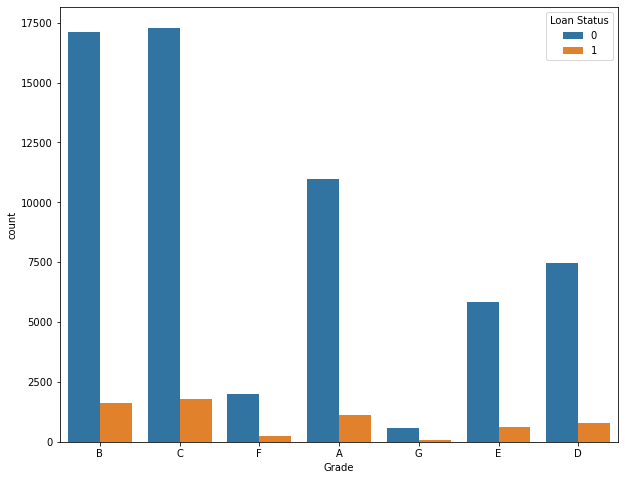

In [16]:
# Plotting count on 'Grade'
plt.figure(figsize = (10,8))
sns.countplot(x = 'Grade', data = df, hue = 'Loan Status')

<AxesSubplot:xlabel='Sub Grade', ylabel='count'>

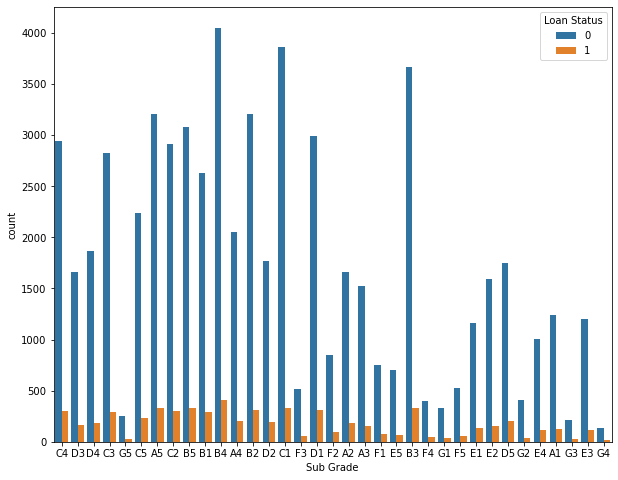

In [17]:
# Plotting count plot on 'Sub Grade'
plt.figure(figsize = (10,8))
sns.countplot(x = 'Sub Grade', data = df, hue = 'Loan Status')

In [18]:
# Checking on 'Loan Title' Feature
print(df['Loan Title'].nunique())
df['Loan Title'].value_counts()

109


Credit card refinancing    30728
Debt consolidation         24841
Debt Consolidation          3544
Other                       2455
Home improvement            2211
                           ...  
Home loan                      6
Personal loan                  5
Getting Ahead                  5
Credit                         4
bills                          4
Name: Loan Title, Length: 109, dtype: int64

In [19]:
# Value count of Application type
df['Application Type'].value_counts()

INDIVIDUAL    67340
JOINT           123
Name: Application Type, dtype: int64

<AxesSubplot:xlabel='Application Type', ylabel='count'>

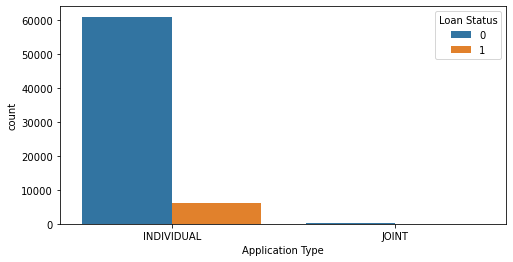

In [87]:
# Count plot of Application Type
plt.figure(figsize = (8,4))
sns.countplot(x = 'Application Type',data = df,hue = 'Loan Status')

#### Analysis:
- Through the statistical summary we can say that below are the reduandant features
        - 'ID'
        - 'Accounts Delinquent',
        - 'Payment Plan', 
        - 'Batch Enrolled', 
        - 'Sub Grade', 
        - 'Loan Title' 
        - 'Application Type'
- Grade can classify so, we reduandant the 'Sub Grade'
- Most of the data in aplication type is relate to 'Individual'. So, no need of keeping this feature. We dropig it

In [21]:
# Dropping the redundant columns
df = df.drop(['ID','Accounts Delinquent','Batch Enrolled','Sub Grade','Payment Plan','Loan Title','Application Type'],axis = 1)

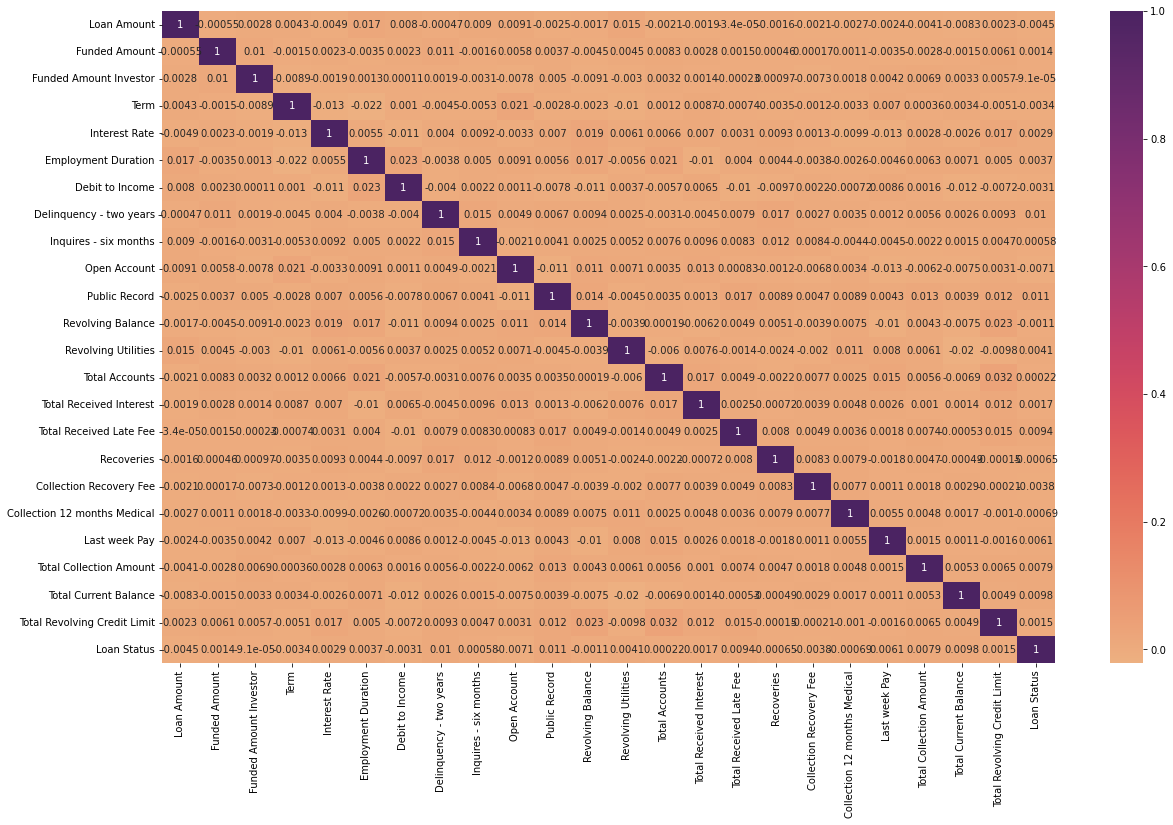

In [22]:
# Heat map for correlation 
plt.fig, ax = plt.subplots( figsize = (20,12) )
corr_matrix = df.corr()
corr_heatmap = sns.heatmap( corr_matrix, cmap = "flare",annot = True)
plt.show()

In [23]:
# Value counts on 'Verification Status'
df['Verification Status'].value_counts()

Source Verified    33036
Verified           18078
Not Verified       16349
Name: Verification Status, dtype: int64

<AxesSubplot:xlabel='Verification Status', ylabel='count'>

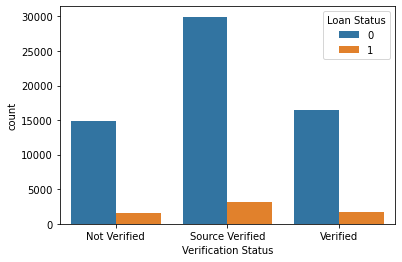

In [24]:
# Count plot for verification status with the hue of Loan status
sns.countplot(x = 'Verification Status', data = df, hue = 'Loan Status')

In [25]:
# Checking for value counts on Delinquency - two years
df['Delinquency - two years'].value_counts()

0    52054
1    11736
2     2651
3      445
7      252
6      191
5       74
8       44
4       16
Name: Delinquency - two years, dtype: int64

<AxesSubplot:xlabel='Delinquency - two years', ylabel='count'>

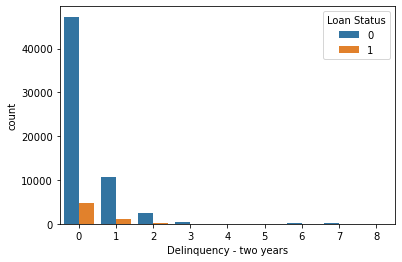

In [26]:
# Count plot of Delinquency - two years
sns.countplot(x = 'Delinquency - two years',data = df,hue = 'Loan Status')

In [27]:
# checking value count on Inquires - six months
df['Inquires - six months'].value_counts()

0    60486
1     4558
2     2042
3      320
4       54
5        3
Name: Inquires - six months, dtype: int64

<AxesSubplot:xlabel='Inquires - six months', ylabel='count'>

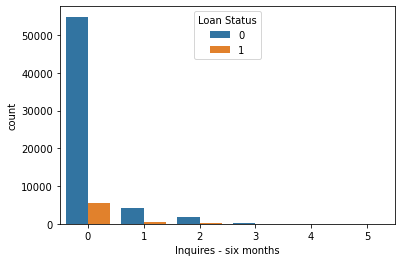

In [28]:
# Count plot of Inquires - six months
sns.countplot(x = 'Inquires - six months',data = df,hue = 'Loan Status')

<AxesSubplot:xlabel='Term', ylabel='count'>

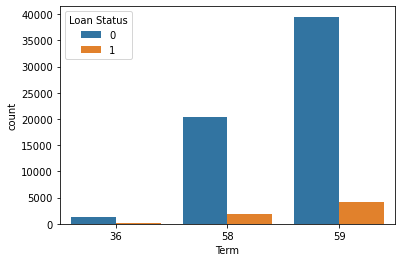

In [29]:
# count plot of Term Coulmn
sns.countplot(x = 'Term',data = df,hue = 'Loan Status')

In [30]:
# Checking value counts of Public Records
df['Public Record'].value_counts()

0    62871
1     4133
2      200
4      184
3       75
Name: Public Record, dtype: int64

<AxesSubplot:xlabel='Public Record', ylabel='count'>

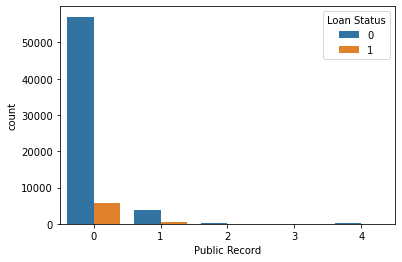

In [31]:
# Countplot of Public Record
sns.countplot(x = 'Public Record',data = df,hue = 'Loan Status')

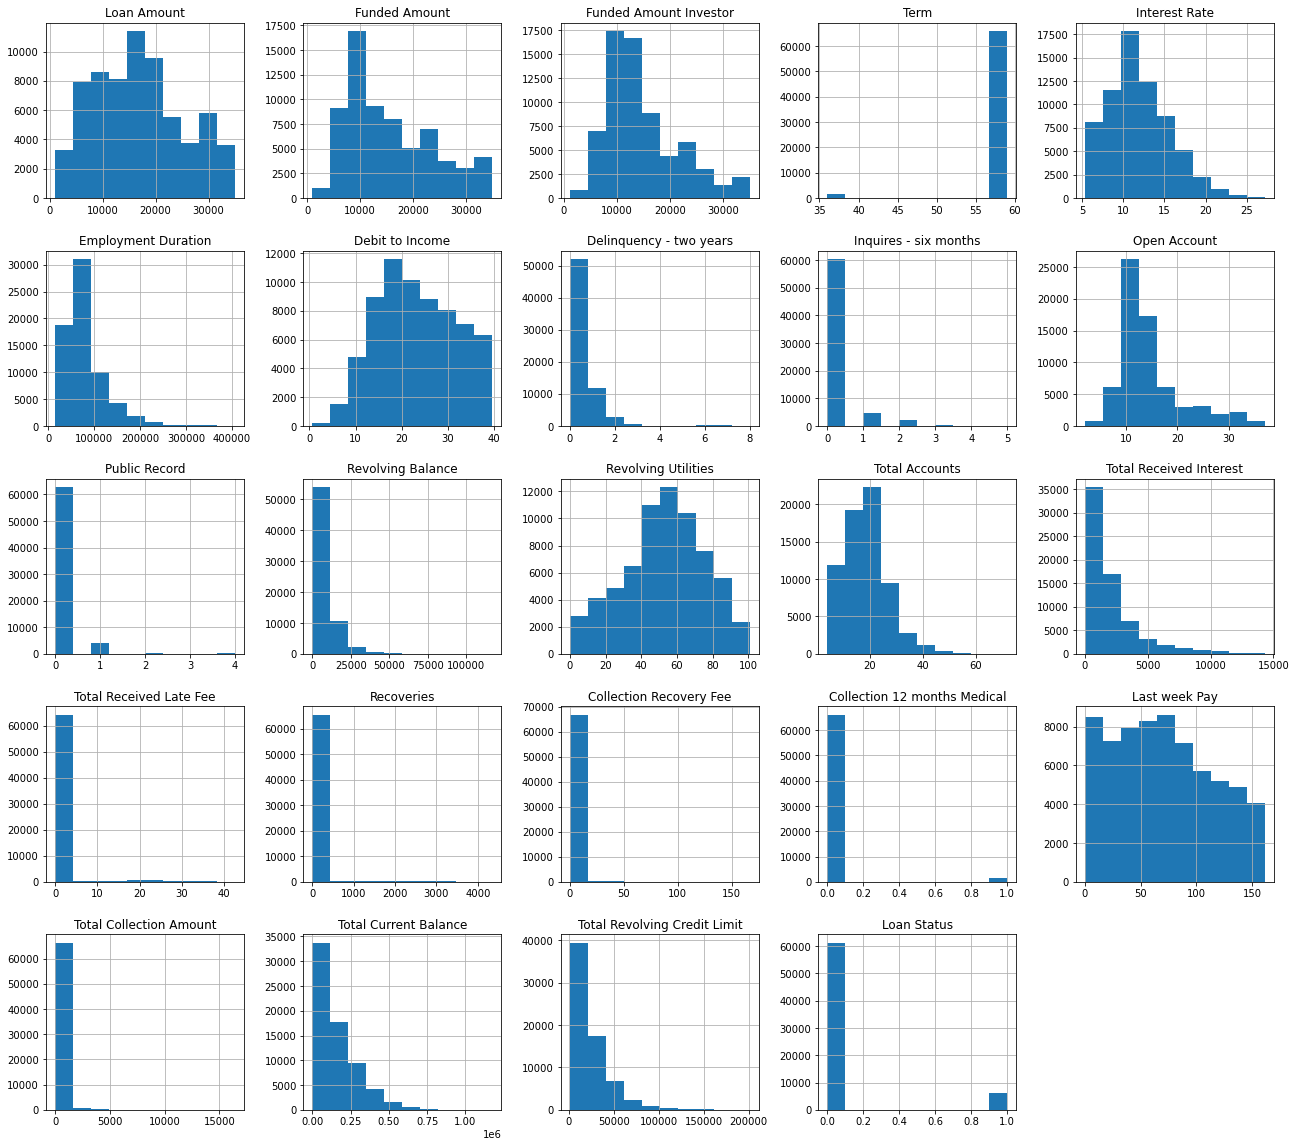

In [32]:
# Histogram for all features
df.hist(figsize=(22,20))
plt.show()

In [33]:
# Checking value counts on Home Ownership
df['Home Ownership'].value_counts()

MORTGAGE    36351
RENT        24150
OWN          6962
Name: Home Ownership, dtype: int64

<AxesSubplot:xlabel='Home Ownership', ylabel='count'>

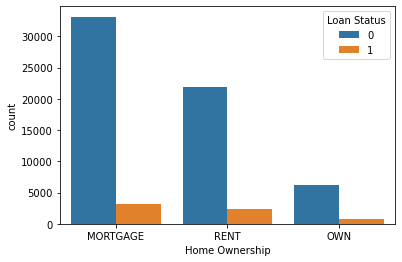

In [34]:
# Count plot on Home Ownership
sns.countplot(x = 'Home Ownership',data = df,hue = 'Loan Status')

In [35]:
# Value count on Initial List Status
df['Initial List Status'].value_counts()

w    36299
f    31164
Name: Initial List Status, dtype: int64

<AxesSubplot:xlabel='Initial List Status', ylabel='count'>

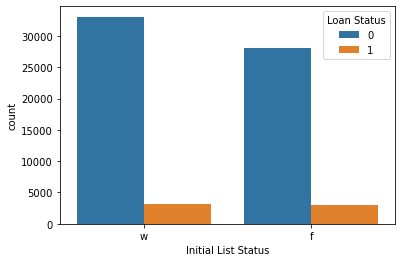

In [36]:
# Count plot of Initial List Status
sns.countplot(x = 'Initial List Status',data = df,hue = 'Loan Status')

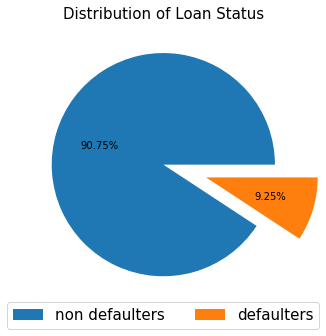

In [37]:
# Distribution of the target column
plt.figure(figsize=(5,10))
plt.pie(df['Loan Status'].value_counts(),explode = (0,0.4),autopct='%.2f%%')
plt.title('Distribution of Loan Status',fontsize = 15)
plt.legend(labels=['non defaulters','defaulters'], loc='center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2,fontsize = 15)
plt.show()

#### Analysis:
- Target Column is Imbalanced most of the data related to 'Non defaulter'
- We have to balance the data using over sampling or under sampling approach.

## 3

### Data preparation for model building

In [38]:
# separate independent and target variable(Loan Status)

X = df.drop('Loan Status',axis = 1)
y = df['Loan Status']

In [39]:
# Encode labels in column 'Grade'.
label_encoder = preprocessing.LabelEncoder()
X['Grade']= label_encoder.fit_transform(X['Grade'])

In [40]:
X['Grade'].value_counts()

2    19085
1    18742
0    12055
3     8259
4     6446
5     2246
6      630
Name: Grade, dtype: int64

In [41]:
X = pd.get_dummies(X,prefix = 'Type')
X.sample(5)

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Type_MORTGAGE,Type_OWN,Type_RENT,Type_Not Verified,Type_Source Verified,Type_Verified,Type_f,Type_w
16905,7971,7672,14987.457370,59,9.042603,3,93148.11513,30.625270,1,0,15,0,8038,15.819157,23,2563.313249,0.005578,0.525738,0.252274,0,87,12,309821,65902,1,0,0,0,1,0,0,1
65054,21183,5665,24873.205370,59,9.139652,1,45055.61208,11.835315,0,0,13,0,2601,62.138882,5,1359.360326,0.090215,0.124220,0.309774,0,115,55,50953,19089,1,0,0,1,0,0,1,0
39130,6288,18467,6114.218168,59,13.658561,1,45779.08926,29.265990,0,0,19,0,1426,81.795852,16,1410.120271,0.037562,4.898326,0.397881,0,130,45,7591,7052,0,0,1,0,0,1,1,0
53688,26508,28309,25096.588040,59,8.474961,4,152743.59450,25.622360,0,0,11,0,2972,59.254080,13,722.036464,0.056695,0.531276,0.151864,0,83,24,186394,49607,1,0,0,0,1,0,0,1
8442,20772,10624,26286.359010,59,13.286530,1,106407.57670,14.483207,0,0,31,0,2569,71.999208,25,136.475385,0.022983,7.976019,0.973380,0,114,13,19582,3964,1,0,0,0,0,1,0,1


In [42]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67463 entries, 0 to 67462
Data columns (total 32 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan Amount                   67463 non-null  int64  
 1   Funded Amount                 67463 non-null  int64  
 2   Funded Amount Investor        67463 non-null  float64
 3   Term                          67463 non-null  int64  
 4   Interest Rate                 67463 non-null  float64
 5   Grade                         67463 non-null  int32  
 6   Employment Duration           67463 non-null  float64
 7   Debit to Income               67463 non-null  float64
 8   Delinquency - two years       67463 non-null  int64  
 9   Inquires - six months         67463 non-null  int64  
 10  Open Account                  67463 non-null  int64  
 11  Public Record                 67463 non-null  int64  
 12  Revolving Balance             67463 non-null  int64  
 13  R

In [43]:
# we are balancing the imbalanced data using Oversampling approach.
from imblearn.over_sampling import SMOTE

smote = SMOTE(sampling_strategy=0.65)
X_res,y_res = smote.fit_resample(X,y)

In [44]:
X_res.shape,y_res.shape

((101016, 32), (101016,))

In [45]:
# Checking the distribution of the resampled target class
pd.DataFrame(y_res).value_counts(normalize=True)*100

Loan Status
0              60.606241
1              39.393759
dtype: float64

- We can observe, we have successfully oversampled the minority class, and the distribution of the target class is balanced 60%-40%.

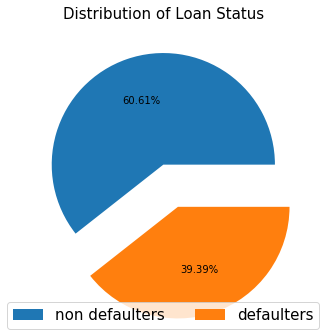

In [46]:
# Distribution of the target column
plt.figure(figsize=(5,10))
plt.pie(y_res.value_counts(),explode = (0,0.4),autopct='%.2f%%')
plt.title('Distribution of Loan Status',fontsize = 15)
plt.legend(labels=['non defaulters','defaulters'], loc='center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2,fontsize = 15)
plt.show()

In [47]:
# Splitting the over sampled data into train and test samples.
X_train, X_test, y_train, y_test = train_test_split(X_res,y_res, test_size=0.20, random_state=42)

print(X_train.shape,X_test.shape)
print(y_train.shape,y_test.shape)

(80812, 32) (20204, 32)
(80812,) (20204,)


In [48]:
# Splitting the original dataset into train and test

X_train_base, X_test_base, y_train_base, y_test_base = train_test_split(X,y, test_size=0.20, random_state=42)

print(X_train_base.shape,X_test_base.shape)
print(y_train_base.shape,y_test_base.shape)

(53970, 32) (13493, 32)
(53970,) (13493,)


## 4

###  Model Building and evaluation

In [49]:
# Building a simple random forest classifier as a base model using original data.
rf = RandomForestClassifier()
rf.fit(X_train_base,y_train_base)

# Prediction on original test data
og_prediction = rf.predict(X_test_base)

# Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))

Accuracy: 0.9097309716149115
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     13493
           1       0.00      0.00      0.00         0

    accuracy                           0.91     13493
   macro avg       0.50      0.45      0.48     13493
weighted avg       1.00      0.91      0.95     13493



#### Analysis:
- We have a accuracy of 91% with the imbalanced data.
- In order to increase our model performance, we need to use the balanced data.
- Precision,recall,f1-score works well on majority class and fails on minority class
- Recall is '0'

#### We use RandomForestClassifier on Balanced data

In [50]:
## Building a simple random forest classifier as a base model using balanced data.
rf1 = RandomForestClassifier()
rf1.fit(X_train,y_train)

## Prediction on original test data
rf1_base = rf1.predict(X_test)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(rf1_base,y_test))
print("Recall:",metrics.recall_score(rf1_base,y_test))
print("Confusion Matrix:\n",metrics.classification_report(rf1_base,y_test))

Accuracy: 0.9229855474163532
Recall: 1.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.89      0.94     13875
           1       0.80      1.00      0.89      6329

    accuracy                           0.92     20204
   macro avg       0.90      0.94      0.92     20204
weighted avg       0.94      0.92      0.92     20204



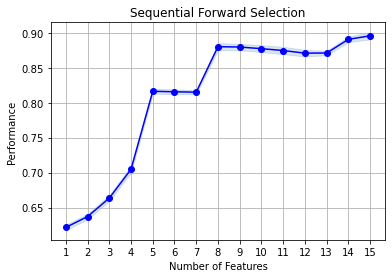

In [52]:
# Build step forward feature selection
sfs1 = sfs(rf1, k_features=15, forward=True, cv=5)
# Perform SFFS
sfs1 = sfs1.fit(X_train.iloc[0:30000], y_train.iloc[0:30000])
sfs2=sfs1.get_metric_dict()
sfs2 = pd.DataFrame.from_dict(sfs2)

fig = plot_sfs(sfs2)

plt.title('Sequential Forward Selection')
plt.grid()
plt.show()

In [53]:
# Which features?
columnList = list(X)
feat_cols = list(sfs1.k_feature_idx_)
print(feat_cols)

[3, 6, 8, 9, 11, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [54]:
# to fetch the names of the columns using the index
subsetColumnList = [columnList[i] for i in feat_cols] 
print(subsetColumnList)

['Term', 'Employment Duration', 'Delinquency - two years', 'Inquires - six months', 'Public Record', 'Collection 12 months Medical', 'Total Collection Amount', 'Total Current Balance', 'Total Revolving Credit Limit', 'Type_MORTGAGE', 'Type_OWN', 'Type_RENT', 'Type_Not Verified', 'Type_Source Verified', 'Type_Verified']


#### Here we are going to build Random Forest Classification model and Tune the hyperparameters for the same using "GridSearchCV"

In [55]:
X_train.head()

,Loan Amount,Funded Amount,Funded Amount Investor,Term,Interest Rate,Grade,Employment Duration,Debit to Income,Delinquency - two years,Inquires - six months,Open Account,Public Record,Revolving Balance,Revolving Utilities,Total Accounts,Total Received Interest,Total Received Late Fee,Recoveries,Collection Recovery Fee,Collection 12 months Medical,Last week Pay,Total Collection Amount,Total Current Balance,Total Revolving Credit Limit,Type_MORTGAGE,Type_OWN,Type_RENT,Type_Not Verified,Type_Source Verified,Type_Verified,Type_f,Type_w
75144,3716,13430,10328.755428,58,6.595147,1,70951.052909,15.792349,0,0,9,0,1571,57.984162,12,493.863869,0.042780,3.673666,1.050552,0,65,452,38715,19893,0,0,0,0,0,0,0,0
19662,10204,11074,11727.012740,59,10.613196,5,65451.163610,20.967208,0,0,11,0,4853,58.377383,24,3456.086135,0.016472,1.194360,0.511849,0,106,36,18839,31694,1,0,0,0,0,1,0,1
31553,16021,13933,13156.127690,36,5.493731,4,80867.500850,38.786634,1,1,7,0,15872,74.393824,18,279.305877,0.008901,3.089835,0.686252,0,88,41,62698,48680,0,1,0,0,0,1,0,1
41407,24020,8097,25133.024500,59,9.977393,0,113270.679800,22.325021,0,0,22,0,9478,88.720567,18,2234.907811,0.052673,4.097469,0.362411,0,124,57,403920,7009,1,0,0,1,0,0,0,1
74446,32303,11070,11280.322111,58,7.810793,2,95020.344951,16.026253,0,0,15,0,8945,48.593553,23,1649.802689,0.058406,2.068462,1.056597,0,99,37,292221,23476,0,0,0,0,0,0,0,0


In [59]:
from sklearn.linear_model import LogisticRegression
logR1 = LogisticRegression(max_iter=1000)
logR1.fit(X_train[subsetColumnList], y_train)

LogisticRegression(max_iter=1000)

In [60]:
y_train_pred = logR1.predict(X_train[subsetColumnList])
print('Training accuracy on selected features: %.3f' % logR1.score(X_train[subsetColumnList], y_train))

Training accuracy on selected features: 0.605


In [61]:
y_test_pred = logR1.predict(X_test[subsetColumnList])
print('Testing accuracy on selected features: %.3f' % logR1.score(X_test[subsetColumnList], y_test))

Testing accuracy on selected features: 0.610


In [62]:
prediction=logR1.predict(X_test[subsetColumnList])
print(metrics.confusion_matrix(y_test, prediction))
print(metrics.classification_report(y_test, prediction))

[[12319     0]
 [ 7885     0]]
              precision    recall  f1-score   support

           0       0.61      1.00      0.76     12319
           1       0.00      0.00      0.00      7885

    accuracy                           0.61     20204
   macro avg       0.30      0.50      0.38     20204
weighted avg       0.37      0.61      0.46     20204



## 5

### Pipeline

In [56]:
# using forward feature selection columns
X_train_new=pd.DataFrame(X_train[subsetColumnList])
X_test_new=pd.DataFrame(X_test[subsetColumnList])

In [57]:
X_train_new.shape

(80812, 15)

In [64]:
col_trans = ColumnTransformer([
    ('ss', StandardScaler(), X_train_new.columns)])

In [66]:
# Building a pipeline
pipeline = Pipeline([ ('preprocessor',col_trans),  # Scaling the data
    ('algo',RandomForestClassifier(random_state=0, n_jobs=-1))
])

In [67]:
col_trans.fit(X_train_new)

ColumnTransformer(transformers=[('ss', StandardScaler(),
                                 Index(['Term', 'Employment Duration', 'Delinquency - two years',
       'Inquires - six months', 'Public Record',
       'Collection 12 months Medical', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit',
       'Type_MORTGAGE', 'Type_OWN', 'Type_RENT', 'Type_Not Verified',
       'Type_Source Verified', 'Type_Verified'],
      dtype='object'))])

In [68]:
# Parameter tuning
param_rf = [{'algo__n_estimators':[100, 200, 500, 1000],
            'algo__max_depth':[7,9, 13,15,19,23,25]}]

In [69]:
# Create an instance of GridSearchCV as model
grid_cv = GridSearchCV(pipeline,param_rf,cv=5,n_jobs=-1,verbose=1)

#learning
grid_cv.fit(X_train_new.iloc[0:30000],y_train.iloc[0:30000])

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",grid_cv.best_params_)

Fitting 5 folds for each of 28 candidates, totalling 140 fits
Best Hyper Parameters:
 {'algo__max_depth': 25, 'algo__n_estimators': 1000}


In [70]:
#evaluation(Confusion Matrix)
prediction_GS = grid_cv.predict(X_test_new)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_GS,y_test))

Confusion Matrix:
 [[12276  2086]
 [   43  5799]]


In [89]:
from sklearn.ensemble import RandomForestClassifier
# Building a pipeline and passing the transformer and the classfier
pipeline_rf = Pipeline([
    ('preprocessor',col_trans),
    ('algo',RandomForestClassifier(max_depth= 25, n_estimators= 1000,random_state=0, n_jobs=-1))
])

In [90]:
## Fitting the pipeline on the train data.
pipeline_rf.fit(X_train_new,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  Index(['Term', 'Employment Duration', 'Delinquency - two years',
       'Inquires - six months', 'Public Record',
       'Collection 12 months Medical', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit',
       'Type_MORTGAGE', 'Type_OWN', 'Type_RENT', 'Type_Not Verified',
       'Type_Source Verified', 'Type_Verified'],
      dtype='object'))])),
                ('algo',
                 RandomForestClassifier(max_depth=25, n_estimators=1000,
                                        n_jobs=-1, random_state=0))])

In [91]:
## Prediction on test data
prediction_rf = pipeline_rf.predict(X_test_new)

## Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(prediction_rf,y_test))
print("Recall:",metrics.recall_score(prediction_rf,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction_rf,y_test))

Accuracy: 0.9017026331419521
Recall: 0.9926507432771003
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     14217
           1       0.75      0.99      0.86      5987

    accuracy                           0.90     20204
   macro avg       0.88      0.93      0.89     20204
weighted avg       0.92      0.90      0.90     20204



#### Using DecisionTreeRegressor 

In [92]:
# Building a simple random forest classifier as a base model using original data.
dt = DecisionTreeClassifier()
dt.fit(X_train,y_train)

# Prediction on original test data
og_prediction_dt = dt.predict(X_test)

# Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(og_prediction_dt,y_test))
print("Recall:",metrics.recall_score(og_prediction_dt,y_test))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction_dt,y_test))

Accuracy: 0.8578004355573153
Recall: 0.8024378469707941
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.87      0.90      0.88     11918
           1       0.84      0.80      0.82      8286

    accuracy                           0.86     20204
   macro avg       0.86      0.85      0.85     20204
weighted avg       0.86      0.86      0.86     20204



In [93]:
# Parameters to tune.
param_rf = [{'algo__criterion':['gini', 'entropy'],
            'algo__max_depth':(7,25)}]

In [94]:
# Create an instance of RandomizedSearchCV as model
random_cv = RandomizedSearchCV(pipeline,param_rf,cv=5,n_jobs=-1,verbose=1)

# learning
random_cv.fit(X_train_new,y_train)

# print best hyperparameters from shared set of parameters
print("Best Hyper Parameters:\n",random_cv.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits
Best Hyper Parameters:
 {'algo__max_depth': 25, 'algo__criterion': 'gini'}


In [95]:
# evaluation(Confusion Matrix)
prediction_RS = random_cv.predict(X_test_new)
print("Confusion Matrix:\n",metrics.confusion_matrix(prediction_RS,y_test))

Confusion Matrix:
 [[12267  1940]
 [   52  5945]]


In [96]:
from sklearn.ensemble import RandomForestClassifier
# Building a pipeline and passing the transformer and the classfier
# Building a pipeline
pipeline_dt = Pipeline([
    ('preprocessor',col_trans),
    ('algo',DecisionTreeClassifier(max_depth= 25, criterion= 'gini',random_state=0))
])

In [97]:
# Fitting the pipeline on the train data.
pipeline_dt.fit(X_train_new,y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('ss', StandardScaler(),
                                                  Index(['Term', 'Employment Duration', 'Delinquency - two years',
       'Inquires - six months', 'Public Record',
       'Collection 12 months Medical', 'Total Collection Amount',
       'Total Current Balance', 'Total Revolving Credit Limit',
       'Type_MORTGAGE', 'Type_OWN', 'Type_RENT', 'Type_Not Verified',
       'Type_Source Verified', 'Type_Verified'],
      dtype='object'))])),
                ('algo', DecisionTreeClassifier(max_depth=25, random_state=0))])

In [98]:
# Prediction on test data
prediction_dt = pipeline_dt.predict(X_test_new)

# Computing Accuracy, Recall, and Confusion matrix for test data
print("Accuracy:",metrics.accuracy_score(prediction_dt,y_test))
print("Recall:",metrics.recall_score(prediction_dt,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction_dt,y_test))

Accuracy: 0.8544347653929915
Recall: 0.8209555959491042
Confusion Matrix:
               precision    recall  f1-score   support

           0       0.89      0.88      0.88     12502
           1       0.80      0.82      0.81      7702

    accuracy                           0.85     20204
   macro avg       0.84      0.85      0.85     20204
weighted avg       0.86      0.85      0.85     20204



## 6

### Conclusions

In [99]:
print('\033[1;46;13m Performance of Base model on Imbalanced Data:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(og_prediction,y_test_base))
print("Recall:",metrics.recall_score(og_prediction,y_test_base))
print("Confusion Matrix:\n",metrics.classification_report(og_prediction,y_test_base))
print('--'*50)

print('\033[1;46;13m Performance of Random Forest Algorithm with tuned hyperparameters, on Balanced Data:\033[0;0m')
print("Accuracy:",metrics.accuracy_score(prediction_rf,y_test))
print("Recall:",metrics.recall_score(prediction_rf,y_test))
print("Confusion Matrix:\n",metrics.classification_report(prediction_rf,y_test))
print('--'*50)

 Performance of Base model on Imbalanced Data:
Accuracy: 0.9097309716149115
Recall: 0.0
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.91      0.95     13493
           1       0.00      0.00      0.00         0

    accuracy                           0.91     13493
   macro avg       0.50      0.45      0.48     13493
weighted avg       1.00      0.91      0.95     13493

----------------------------------------------------------------------------------------------------
 Performance of Random Forest Algorithm with tuned hyperparameters, on Balanced Data:
Accuracy: 0.9017026331419521
Recall: 0.9926507432771003
Confusion Matrix:
               precision    recall  f1-score   support

           0       1.00      0.86      0.93     14217
           1       0.75      0.99      0.86      5987

    accuracy                           0.90     20204
   macro avg       0.88      0.93      0.89     20204
weighted avg       0.92      0.9

### Conclusion:

- We compare results of base model and the tuned model, The accuracy of the model on imbalanced data is 91% but with the recall '0'.
- But on the tuned parameters and on balanced data Accuracy is 90% and Recall is 99.3%
- We had 32 features in balanced data and by using forward feature selection we slected k = 15 as the best features.
- Then we have tuned the hyperparameters for the Random Forest Classifier using the GridSearchCV with 5folds on the K best features.(the best combination of hyperparameters were 'max_depth': 25, 'n_estimators': 1000).
- We have also tuned the hyperparameters for the Decision Tree Classifier using the RandomozedSearchCV with 5folds on the K best features.(the best combination of hyperparameters were 'max_depth': 25, 'criterion': 'gini'}).
- From the both models that we have built we would prefer Random Forest algorithm over the Decision Tree Classifier based on the algorithm performance on the data. 
- have implemented two models for model selection and performed respective hyperparameter tuning. Further, we can try out different data balancing approach, feature selection, and different models and hyperparameters to get best results.